# Machine Learning Module

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

os.chdir("../marketdata")
import yahoo
import alpaca

os.chdir("../technicals")
import technicals

In [2]:
test_tickers = ["ADSK"]
ohlcv_df = alpaca.ohlcv(test_tickers)
tech_ind = technicals.TechnicalAnalysis(ohlcv_df)
df = tech_ind.get_all_technicals(test_tickers[0])

In [3]:
# df.drop(columns=["open","high","low","close","volume"], inplace=True)
df.head()

,open,high,low,close,volume,rsi,williams,mfi,stoch_k,lagging_returns
time,,,,,,,,,,
2020-01-23 00:00:00-05:00,195.39,198.91,193.760,198.61,2811255,37.348426,-1.904762,71.658062,55.990975,0.75
2020-01-24 00:00:00-05:00,199.43,200.90,197.910,199.20,4494049,38.582801,-9.582864,78.676467,47.346634,4.75
2020-01-27 00:00:00-05:00,195.77,197.15,192.960,195.86,1484335,34.464274,-31.898734,71.527231,27.590461,6.20
2020-01-28 00:00:00-05:00,196.26,200.43,195.675,199.96,1004916,42.532387,-6.777217,71.650518,55.543877,6.05
2020-01-29 00:00:00-05:00,200.92,201.57,198.860,199.70,653878,42.179570,-16.120690,71.763475,56.887377,7.34


In [4]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number].values
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).astype(np.float64).reshape(-1, 1)

In [5]:
window_size = 14

In [10]:
(X, y) = window_data(df, window_size, 0, len(df.columns)-1)

# X = np.array(df.drop(columns=["lagging_returns"]))
# y = np.array(df["lagging_returns"]).astype(np.float64).reshape(-1, 1)

In [11]:
(rsi, _) = window_data(df, window_size, 0, 5)
(williams, _) = window_data(df, window_size, 1, 5)
(mfi, _) = window_data(df, window_size, 2, 5)
(stoch_k, _) = window_data(df, window_size, 3, 5)
(pvt, _) = window_data(df, window_size, 4, 5)
(lagging_returns, _) = window_data(df, window_size, 5, 5)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
rsi = scaler.fit_transform(rsi)
williams = scaler.fit_transform(williams)
mfi = scaler.fit_transform(mfi)
stoch_k = scaler.fit_transform(stoch_k)
pvt = scaler.fit_transform(pvt)
lagging_returns = scaler.fit_transform(lagging_returns)

In [13]:
split = int(0.8 * len(X))

X_train = X[: split - 1]
y_train = y[: split - 1]
rsi_train = rsi[: split - 1]
williams_train = williams[: split - 1]
mfi_train = mfi[: split - 1]
stoch_k_train = stoch_k[: split - 1]
pvt_train = pvt[: split - 1]
lagging_returns_train = lagging_returns[: split - 1]

X_test = X[split:]
y_test = y[split:]
rsi_test = rsi[split:]
williams_test = williams[split:]
mfi_test = mfi[split:]
stoch_k_test = stoch_k[split:]
pvt_test = pvt[split:]
lagging_returns_test = lagging_returns[split:]

In [14]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
rsi_train = rsi_train.reshape((rsi_train.shape[0], rsi_train.shape[1], 1))
williams_train = williams_train.reshape((williams_train.shape[0], williams_train.shape[1], 1))
mfi_train = mfi_train.reshape((mfi_train.shape[0], mfi_train.shape[1], 1))
stoch_k_train = stoch_k_train.reshape((stoch_k_train.shape[0], stoch_k_train.shape[1], 1))
pvt_train = pvt_train.reshape((pvt_train.shape[0], pvt_train.shape[1], 1))
lagging_returns_train = lagging_returns_train.reshape((lagging_returns_train.shape[0], lagging_returns_train.shape[1], 1))


X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
rsi_test = rsi_test.reshape((rsi_test.shape[0], rsi_test.shape[1], 1))
williams_test = williams_test.reshape((williams_test.shape[0], williams_test.shape[1], 1))
mfi_test = mfi_test.reshape((mfi_test.shape[0], mfi_test.shape[1], 1))
stoch_k_test = stoch_k_test.reshape((stoch_k_test.shape[0], stoch_k_test.shape[1], 1))
pvt_test = pvt_test.reshape((pvt_test.shape[0], pvt_test.shape[1], 1))
lagging_returns_test = lagging_returns_test.reshape((lagging_returns_test.shape[0], lagging_returns_test.shape[1], 1))

data_train = np.concatenate((X_train, rsi_train, williams_train, mfi_train, stoch_k_train, pvt_train, lagging_returns_train), axis=2)
data_test = np.concatenate((X_test, rsi_test, williams_test, mfi_test, stoch_k_test, pvt_test, lagging_returns_test), axis=2)

In [15]:
y.shape

(340, 1)

In [16]:
X.shape

(340, 14)

In [17]:
def conv(n_filters : int,
         fsize : int, 
         window_size : int, 
         n_features : int):
    '''
    Convolutional Neural Net
    '''
        
    m = keras.Sequential()
    m.add(tf.keras.layers.Conv2D(n_filters, (1,fsize), padding="same", activation="relu", input_shape=(window_size, n_features, 1)))
    m.add(tf.keras.layers.Flatten())
    m.add(tf.keras.layers.Dense(10000, activation='relu'))
    m.add(tf.keras.layers.Dense(1000))
    m.add(tf.keras.layers.Dense(100))
    m.add(tf.keras.layers.Dense(1))
    m.compile(optimizer="adam", loss="mean_squared_error")   
    
    return m

In [18]:
data_train_wide = data_train.reshape((data_train.shape[0], data_train.shape[1], data_train.shape[2], 1))
data_test_wide = data_test.reshape((data_test.shape[0], data_test.shape[1], data_test.shape[2], 1))

In [19]:
model = conv(n_filters=5, fsize=5, window_size=window_size, n_features=data_train_wide.shape[2])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 7, 5)          30        
_________________________________________________________________
flatten (Flatten)            (None, 490)               0         
_________________________________________________________________
dense (Dense)                (None, 10000)             4910000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              10001000  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 15,011,231
Trainable params: 15,011,231
Non-trainable params: 0
____________________________________________

In [21]:
hist = model.fit(data_train_wide, y_train, epochs=40)

Epoch 1/40
9/9 [==============================] - 1s 46ms/step - loss: 250.8005
Epoch 2/40
9/9 [==============================] - 0s 47ms/step - loss: 220.2065
Epoch 3/40
9/9 [==============================] - 0s 47ms/step - loss: 198.7012
Epoch 4/40
9/9 [==============================] - 0s 45ms/step - loss: 168.1766
Epoch 5/40
9/9 [==============================] - 0s 44ms/step - loss: 122.8348
Epoch 6/40
9/9 [==============================] - 0s 45ms/step - loss: 123.5491
Epoch 7/40
9/9 [==============================] - 0s 47ms/step - loss: 112.3051
Epoch 8/40
9/9 [==============================] - 0s 45ms/step - loss: 80.4975
Epoch 9/40
9/9 [==============================] - 0s 47ms/step - loss: 61.2870
Epoch 10/40
9/9 [==============================] - 0s 44ms/step - loss: 44.7405
Epoch 11/40
9/9 [==============================] - 0s 44ms/step - loss: 45.4499
Epoch 12/40
9/9 [==============================] - 0s 49ms/step - loss: 37.8706
Epoch 13/40
9/9 [=========================

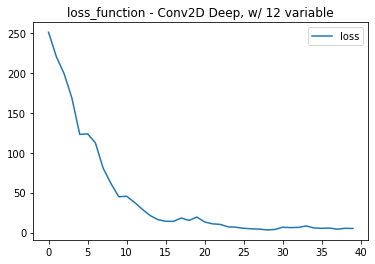

In [22]:
plt.plot(hist.history["loss"])
plt.title("loss_function - Conv2D Deep, w/ 12 variable")
plt.legend(["loss"])
# 
plt.show()

In [23]:
model.evaluate(data_test_wide, y_test, verbose=0)

239.69830322265625

In [24]:
from sklearn.metrics import r2_score
predictions = model.predict(data_test_wide)
test_r2 = r2_score(y_test, predictions)
test_r2

-0.697976228172819

In [25]:
conv_acc_df = pd.DataFrame()
conv_acc_df['Actual'] = y_test[:,0]
conv_acc_df['Predict'] = predictions[:,0]
conv_acc_df.head(10)

,Actual,Predict
0,0.67,5.952254
1,-9.99,9.473389
2,-13.02,17.597910
3,-3.64,21.792871
4,7.41,23.135660
5,7.37,26.529739
6,11.53,22.915464
7,14.91,19.585857
8,25.13,24.256283
9,23.55,23.696602


<AxesSubplot:>

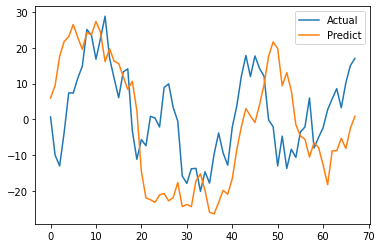

In [26]:
conv_acc_df.plot()

## Get last 2 weeks of data

In [27]:
from datetime import date, datetime, timedelta

start_date  = datetime.now()
end_date  = (start_date - timedelta(days=21))

start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')

print(f"Start date : {start_date}")
print(f"End date : {end_date}")

Start date : 2021-07-10
End date : 2021-06-19


In [28]:
test_tickers

['ADSK']

In [29]:
ohlcv_df = alpaca.ohlcv(test_tickers, start_date=start_date, end_date=end_date)
tech_ind_test = technicals.TechnicalAnalysis(ohlcv_df)
test_df = tech_ind.get_all_technicals(test_tickers[0])

In [30]:
from sklearn.metrics import r2_score
test_predictions = model.predict(data_test_wide)
test_r2 = r2_score(y_test, predictions)
test_r2

-0.697976228172819